In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This ingests our csv files, looking at whatever team is passed to the function only, one season at a time. It grabs only the stuff we (might) use, and makes one more metric, the rank%, which adjusts the team rank for the size of the league. After all, 16th place is almost middle of the pack these days, but in 1903 that would have been last.

In [181]:
def team_dict_creator(team_name):
    team_hist=[]
    for year in range(1903, 2015):
        season={}
        year_str=str(year)
        df=pd.read_csv('MLB/MLB_'+year_str+'.csv')
        total_teams=len(df)-1
        if team_name in df['Tm'].values:
            season['year']=year
            season['W']=int(df[df['Tm']==team_name]['W'])
            season['L']=int(df[df['Tm']==team_name]['L'])
            season['Rk']=int(df[df['Tm']==team_name]['Rk'])
            season['W-L%']=float(df[df['Tm']==team_name]['W-L%'])
            season['Rk%']=int(df[df['Tm']==team_name]['Rk'])/total_teams
            team_hist.append(season)
    return team_hist

This one is our heuristic for total misery. This version is championship agnostic, even though I originally planned on using championships. The final version still might, but until then, finishing in the top 10% reduces a full point of misery, top 25% knocks off a half point, top 45% a quarter, and then from there you add points. This will go year by year and spit out a series of the same length as the data frame passed to it.

In [117]:
def misery_calc(df):
    misery=[]
    total_misery=0
    for row in df['Rk%']:
        if row<=0.1:
            total_misery-=1
            misery.append(total_misery)
        elif row<=0.25:
            total_misery-=0.5
            misery.append(total_misery)
        elif row<=0.45:
            total_misery-=0.25
            misery.append(total_misery)
        elif row<=0.55:
            total_misery+=0.25
            misery.append(total_misery)
        elif row<=0.75:
            total_misery+=0.5
            misery.append(total_misery)
        else:
            total_misery+=1
            misery.append(total_misery)
    return misery

This next part is done to ingest just the team three letter codes, so we can call each in the function above, and eventually put the teams into city sized bins.

In [191]:
team_names=set()
for year in range(1903, 2015):
    year_str=str(year)
    df=pd.read_csv('MLB/MLB_'+year_str+'.csv')
    names=df['Tm'].tolist()
    names.pop(-1)
    team_names.update(names)

Here we create our main data object, calling our function above for each team code.

In [193]:
season_history={}
for team in team_names:
    season_history[team]=team_dict_creator(team)
season_history

{'ANA': [{'L': 78,
   'Rk': 11,
   'Rk%': 0.39285714285714285,
   'W': 84,
   'W-L%': 0.518,
   'year': 1997},
  {'L': 77, 'Rk': 12, 'Rk%': 0.4, 'W': 85, 'W-L%': 0.525, 'year': 1998},
  {'L': 92,
   'Rk': 23,
   'Rk%': 0.7666666666666667,
   'W': 70,
   'W-L%': 0.43200000000000005,
   'year': 1999},
  {'L': 80, 'Rk': 15, 'Rk%': 0.5, 'W': 82, 'W-L%': 0.506, 'year': 2000},
  {'L': 87,
   'Rk': 20,
   'Rk%': 0.6666666666666666,
   'W': 75,
   'W-L%': 0.46299999999999997,
   'year': 2001},
  {'L': 63,
   'Rk': 4,
   'Rk%': 0.13333333333333333,
   'W': 99,
   'W-L%': 0.611,
   'year': 2002},
  {'L': 85,
   'Rk': 19,
   'Rk%': 0.6333333333333333,
   'W': 77,
   'W-L%': 0.475,
   'year': 2003},
  {'L': 70, 'Rk': 6, 'Rk%': 0.2, 'W': 92, 'W-L%': 0.568, 'year': 2004}],
 'ARI': [{'L': 97,
   'Rk': 28,
   'Rk%': 0.9333333333333333,
   'W': 65,
   'W-L%': 0.401,
   'year': 1998},
  {'L': 62,
   'Rk': 2,
   'Rk%': 0.06666666666666667,
   'W': 100,
   'W-L%': 0.617,
   'year': 1999},
  {'L': 77,
   '

These are just some tests

In [194]:
season_history.keys()

dict_keys(['PBS', 'BTT', 'FLA', 'SEA', 'BUF', 'MLN', 'NYM', 'CAL', 'WSA', 'NYY', 'TBD', 'IND', 'PHI', 'TEX', 'OAK', 'WSN', 'CIN', 'WSH', 'STL', 'MON', 'BSN', 'DET', 'TOR', 'KCA', 'HOU', 'COL', 'PHA', 'BAL', 'BOS', 'PIT', 'BRO', 'SDP', 'CHI', 'CLE', 'MIL', 'KCP', 'ANA', 'LAA', 'CHC', 'LAD', 'ARI', 'ATL', 'SEP', 'NEW', 'SLB', 'KCR', 'SLM', 'MIA', 'CHW', 'SFG', 'MIN', 'TBR', 'NYG'])

In [206]:
df=pd.DataFrame(season_history['PBS'])
df

,L,Rk,Rk%,W,W-L%,year
0,86,21,0.875000,64,0.427,1914
1,67,8,0.333333,86,0.562,1915


In [242]:
year=cle_df[cle_df['misery']==cle_df['misery'].max()]['year'].values#[['year', 'misery']]
year

array([2012])

I did this next bit to try and determine my most interesting teams, to highlight them in my initial graph. Turns out the Phillies are the most miserable team to follow as a fan, while Yankees fans are the most spoiled.

In [243]:
highest_misery=[]
lowest_misery=[]
for key in season_history.keys():
    df=pd.DataFrame(season_history[key])
    df['misery']=misery_calc(df)
    team_high={}
    team_low={}
    team_high['Tm']=key
    team_high['year']=df[df['misery']==df['misery'].max()]['year'].values
    team_high['max']=df[df['misery']==df['misery'].max()]['misery'].values
    highest_misery.append(team_high)
    team_low['Tm']=key
    team_low['year']=df[df['misery']==df['misery'].min()]['year'].values
    team_low['max']=df[df['misery']==df['misery'].min()]['misery'].values
    lowest_misery.append(team_low)

In [244]:
pd.DataFrame(highest_misery)

,Tm,max,year
0,PBS,[1.0],[1914]
1,BTT,[1.25],[1915]
2,FLA,[8.25],[2011]
3,SEA,[19.25],[2013]
4,BUF,[0.25],[1915]
5,MLN,[-0.5],[1953]
6,NYM,[15.25],[2014]
7,CAL,[13.5],[1996]
8,WSA,[9.75],[1971]
9,NYY,[5.25],[1918]


In [246]:
pd.DataFrame(lowest_misery)

,Tm,max,year
0,PBS,[0.75],[1915]
1,BTT,[0.25],[1914]
2,FLA,[1.0],[1993]
3,SEA,[1.0],[1977]
4,BUF,[-0.25],[1914]
5,MLN,[-4.75],[1962]
6,NYM,[1.0],[1962]
7,CAL,[0.5],[1965]
8,WSA,[1.0],[1961]
9,NYY,"[-41.5, -41.5]","[2012, 2014]"


This is just to get a preliminary graph going. We unpack the data object one team at a time, call up the misery calc, and then graph it. Since we identified the Yankees and Phillies as our most interesting franchises for the purpose of this graph, those are highlighted (sort of in their colors).

This is pretty much how I imagined this graph would look, although it is not how it should ultimately work. This is just for baseball franchises, not for cities, and it is still doesn't care about championships. Also, I'm not sure if I ultimately want "misery" to go negative. Negative misery? Sounds like happiness? I guess that's what it is, but that might have to be a separate chart eventually.

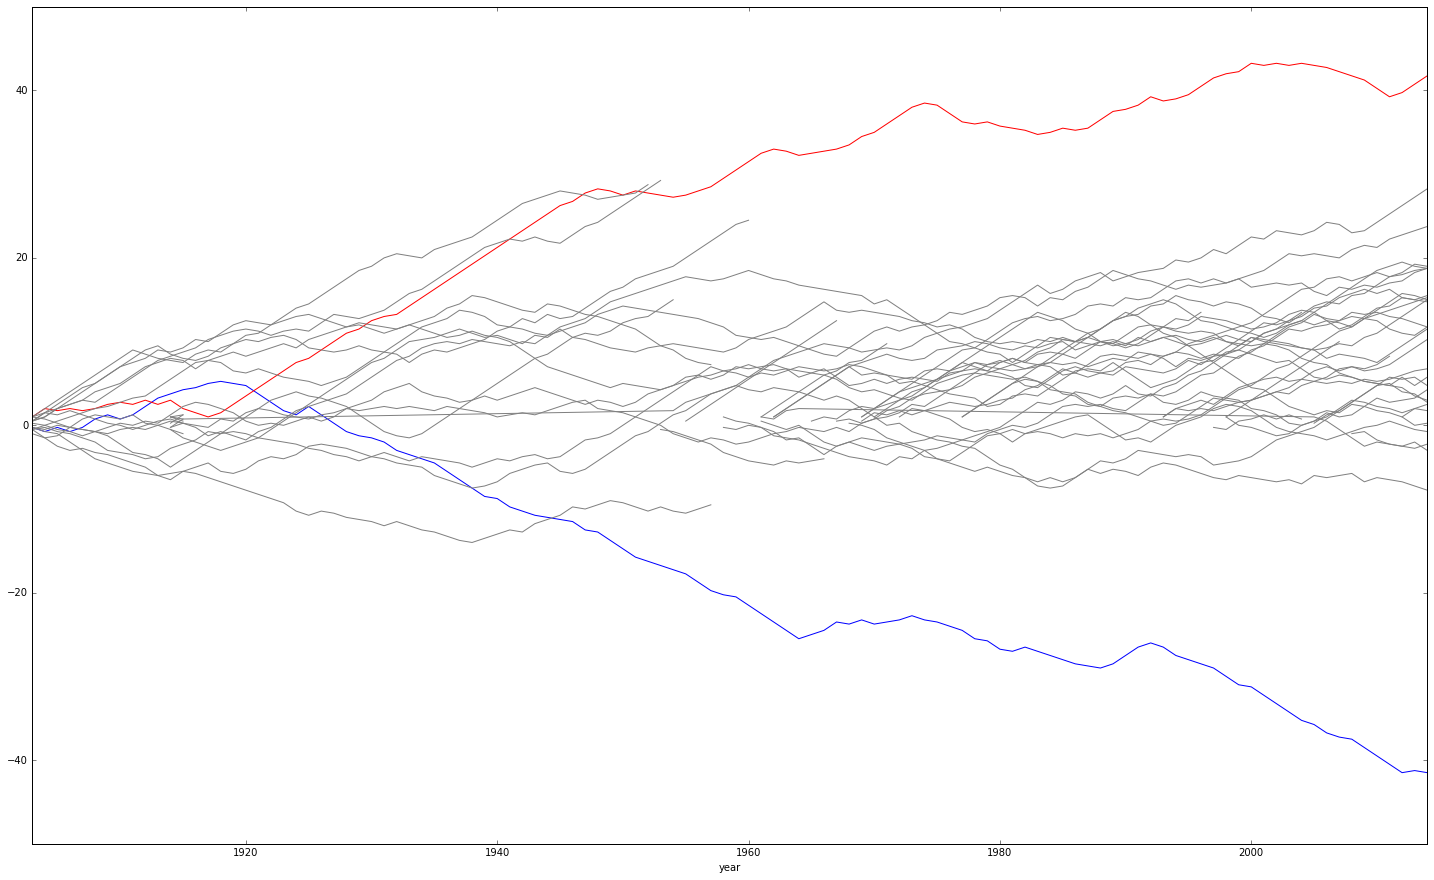

In [249]:
fig, ax=plt.subplots(figsize=(25,15))

for key in season_history.keys():
    if key=='PHI':
        color='red'
    elif key=='NYY':
        color='blue'
    else:
        color='gray'
    df=pd.DataFrame(season_history[key])
    df['misery']=misery_calc(df)
    df.plot(x='year', y='misery', ax=ax, legend=False, color=color)

plt.savefig('MLB_misery_index.pdf')

So now we're working through the cities bins. Our first goal will be to make a map, so we will know later which franchises go to which cities. I wound up having to do this by hand, because although many of these three letter codes are fairly obvious (MIA, for instance), many of them I had to look up. NEW is the Newark Peppers, a team that totally existed and totally played in Newark (for two years, 1914-15). A lot of these franchises are defunct, renamed, or have moved (and then renamed and became defunct). 

Baseball history is complicated. I can't wait for the easy leagues.

In [250]:
season_history.keys()

dict_keys(['PBS', 'BTT', 'FLA', 'SEA', 'BUF', 'MLN', 'NYM', 'CAL', 'WSA', 'NYY', 'TBD', 'IND', 'PHI', 'TEX', 'OAK', 'WSN', 'CIN', 'WSH', 'STL', 'MON', 'BSN', 'DET', 'TOR', 'KCA', 'HOU', 'COL', 'PHA', 'BAL', 'BOS', 'PIT', 'BRO', 'SDP', 'CHI', 'CLE', 'MIL', 'KCP', 'ANA', 'LAA', 'CHC', 'LAD', 'ARI', 'ATL', 'SEP', 'NEW', 'SLB', 'KCR', 'SLM', 'MIA', 'CHW', 'SFG', 'MIN', 'TBR', 'NYG'])

In [270]:
cities_map={
    'Pittsburgh':    ['PBS', 'PIT'],
    'Brooklyn':      ['BTT', 'BRO'],
    'Miami':         ['FLA', 'MIA'],
    'Seattle':       ['SEA', 'SEP'],
    'Buffalo':       ['BUF'],
    'Milwaukee':     ['MLN', 'MIL'],
    'New York':      ['NYM', 'NYY', 'NYG'],
    'Los Angeles':   ['CAL', 'ANA', 'LAA', 'LAD'],
    'Washington':    ['WSA', 'WSN', 'WSH'],
    'Tampa Bay':     ['TBD', 'TBR'],
    'Indianapolis':  ['IND'],
    'Philadelphia':  ['PHI', 'PHA'],
    'Dallas':        ['TEX'],
    'Oakland':       ['OAK'],
    'Cincinnati':    ['CIN'],
    'St. Louis':     ['STL', 'SLB', 'SLM'],
    'Montreal':      ['MON'],
    'Boston':        ['BSN', 'BOS'],
    'Detroit':       ['DET'],
    'Toronto':       ['TOR'],
    'Kansas City':   ['KCA', 'KCP', 'KCR'],
    'Houston':       ['HOU'],
    'Denver':        ['COL'],
    'Baltimore':     ['BAL'],
    'San Diego':     ['SDP'],
    'Chicago':       ['CHI', 'CHC', 'CHW'],
    'Cleveland':     ['CLE'],
    'Phoenix':       ['ARI'],
    'Atlanta':       ['ATL'],
    'Newark':        ['NEW'],
    'San Francisco': ['SFG'],
    'Minneapolis':   ['MIN']
}

In [347]:
len(cities_map)

32

In [315]:
misery_totals=[]
for city in cities_map.keys():
    city_mis={}
    city_mis['city']=city
    team_list=[]
    for team in cities_map[city]:
        team_mis={}
        team_mis[team]=team_dict_creator(team)
        team_list.append(team_mis)
    city_mis['teams']=team_list
    misery_totals.append(city_mis)

In [316]:
misery_totals[0]['teams'][0]

{'MLN': [{'L': 62, 'Rk': 4, 'Rk%': 0.25, 'W': 92, 'W-L%': 0.597, 'year': 1953},
  {'L': 65, 'Rk': 6, 'Rk%': 0.375, 'W': 89, 'W-L%': 0.578, 'year': 1954},
  {'L': 69, 'Rk': 4, 'Rk%': 0.25, 'W': 85, 'W-L%': 0.552, 'year': 1955},
  {'L': 62, 'Rk': 3, 'Rk%': 0.1875, 'W': 92, 'W-L%': 0.597, 'year': 1956},
  {'L': 59, 'Rk': 2, 'Rk%': 0.125, 'W': 95, 'W-L%': 0.617, 'year': 1957},
  {'L': 62, 'Rk': 1, 'Rk%': 0.0625, 'W': 92, 'W-L%': 0.597, 'year': 1958},
  {'L': 70, 'Rk': 4, 'Rk%': 0.25, 'W': 86, 'W-L%': 0.551, 'year': 1959},
  {'L': 66,
   'Rk': 4,
   'Rk%': 0.25,
   'W': 88,
   'W-L%': 0.5710000000000001,
   'year': 1960},
  {'L': 71,
   'Rk': 7,
   'Rk%': 0.3888888888888889,
   'W': 83,
   'W-L%': 0.539,
   'year': 1961},
  {'L': 76, 'Rk': 9, 'Rk%': 0.45, 'W': 86, 'W-L%': 0.531, 'year': 1962},
  {'L': 78, 'Rk': 12, 'Rk%': 0.6, 'W': 84, 'W-L%': 0.518, 'year': 1963},
  {'L': 74,
   'Rk': 9,
   'Rk%': 0.45,
   'W': 88,
   'W-L%': 0.5429999999999999,
   'year': 1964},
  {'L': 76, 'Rk': 10, 'Rk%

In [361]:
final_misery_grid=[]
for city in misery_totals:    
    final_dict={}
    final_dict['city']=city['city']
    final_dict['misery_df']=[]
    for teams in city['teams']:
        for team in teams.keys():
            df=pd.DataFrame(teams[team])
            team_misery=misery_calc(df)
            df['misery']=team_misery
            df.index=df['year']
            final_dict['misery_df'].append(df)
    final_misery_grid.append(final_dict)

Well, that was interesting. We have everything grouped into cities and the index is set. Now to test adding the columns.

In [381]:
final_misery_grid[0]['misery_df'][0]['misery']#.add(final_misery_grid[0]['misery_df'][1]['misery'], fill_value=0)

year
1953   -0.50
1954   -0.75
1955   -1.25
1956   -1.75
1957   -2.25
1958   -3.25
1959   -3.75
1960   -4.25
1961   -4.50
1962   -4.75
1963   -4.25
1964   -4.50
1965   -4.25
1966   -4.00
Name: misery, dtype: float64

This isnt exactly right, since the misery of the previous team wasn't carried over to the point where the new franchise took over. This is because there is a gap between the years 1966 and 1970 in the example above. I think, in order to fix this, I will have to go back and adjust how my numbers are being generated, assuring that each year gets zero filled. I will also have to adjust for that in the misery number calculations, since a year with no teams probably shouldn't accrue fan misery.

But this is good enough for an initial chart, at least.

In [390]:
plot_df=pd.DataFrame()
plot_df['final_misery_grid[0]['misery_df'][0]['misery']#.add(final_misery_grid[0]['misery_df'][1]['misery'], fill_value=0)
y_axis=final_misery_grid[0]['misery_df'][0]['year']#.add(final_misery_grid[0]['misery_df'][1]['year'], fill_value=0)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

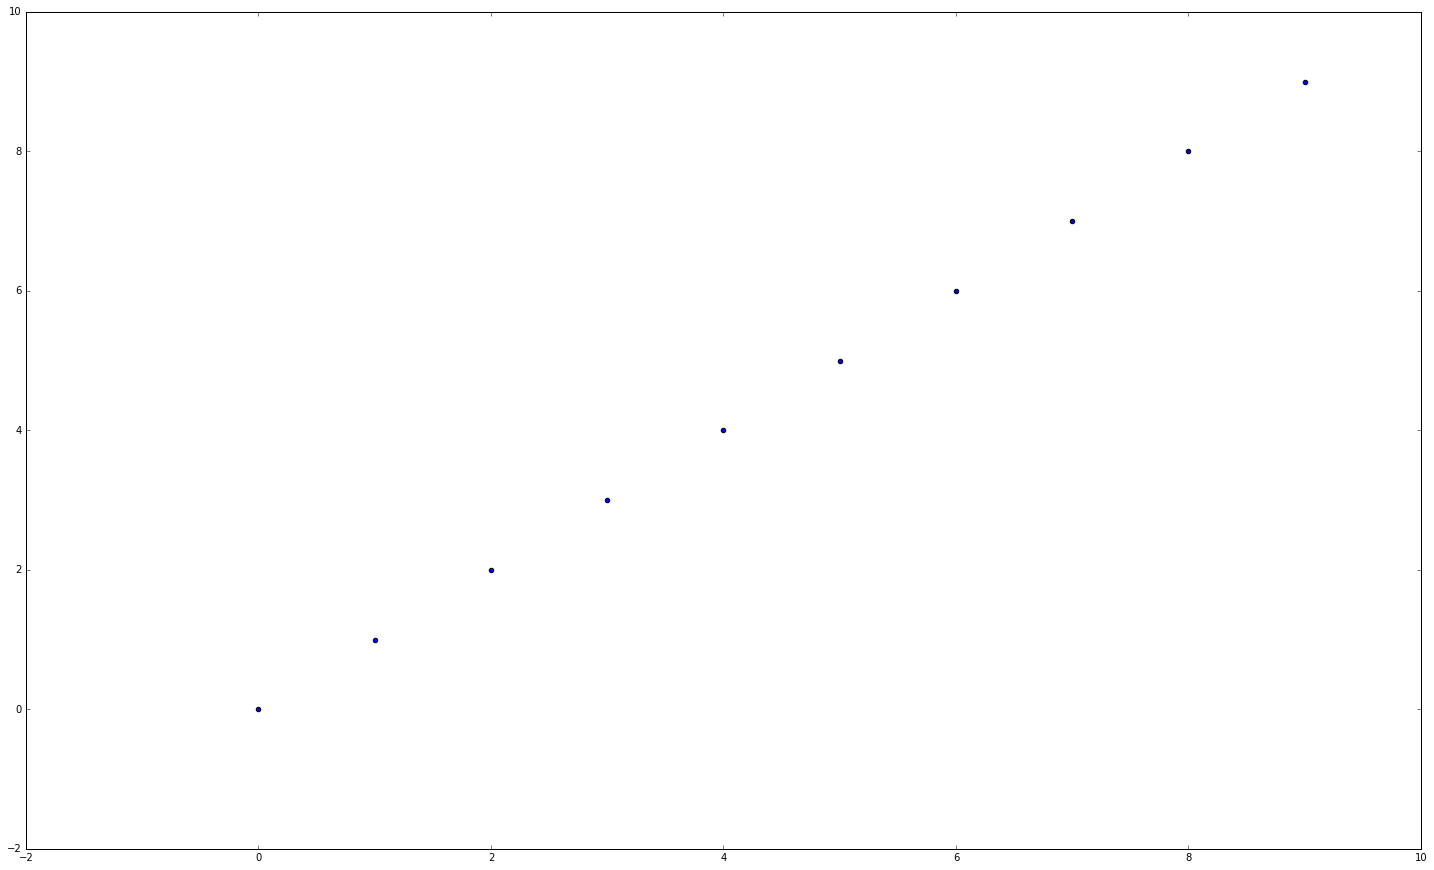

In [395]:
# x_axis=final_misery_grid[0]['misery_df'][0]['misery']#.add(final_misery_grid[0]['misery_df'][1]['misery'], fill_value=0)
# y_axis=final_misery_grid[0]['misery_df'][0]['year']#.add(final_misery_grid[0]['misery_df'][1]['year'], fill_value=0)
x_axis=x_axis=[x for x in range(0,10)]
fig, ax=plt.subplots(figsize=(25,15))
plt.scatter(x=x_axis, y=x_axis)

The rest of this stuff is early models for the data and for the graph, that got pushed down to the bottom as it became more irrelevant.

In [170]:
chc=[]
for year in range(1903, 2015):
    season={}
    year_str=str(year)
    df=pd.read_csv('MLB/MLB_'+year_str+'.csv')
    total_teams=len(df)-1
    season['year']=year
    season['W']=int(df[df['Tm']=='CHC']['W'])
    season['L']=int(df[df['Tm']=='CHC']['L'])
    season['Rk']=int(df[df['Tm']=='CHC']['Rk'])
    season['W-L%']=float(df[df['Tm']=='CHC']['W-L%'])
    season['Rk%']=int(df[df['Tm']=='CHC']['Rk'])/total_teams
    chc.append(season)

In [171]:
chc_df=pd.DataFrame(chc)

In [173]:
chc_df['misery']=misery_calc(chc_df)

In [174]:
nyg=[]
for year in range(1903, 2015):
    season={}
    year_str=str(year)
    df=pd.read_csv('MLB/MLB_'+year_str+'.csv')
    total_teams=len(df)-1
    if 'NYG' in df['Tm'].values:
        season['year']=year
        season['W']=int(df[df['Tm']=='NYG']['W'])
        season['L']=int(df[df['Tm']=='NYG']['L'])
        season['Rk']=int(df[df['Tm']=='NYG']['Rk'])
        season['W-L%']=float(df[df['Tm']=='NYG']['W-L%'])
        season['Rk%']=int(df[df['Tm']=='NYG']['Rk'])/total_teams
        nyg.append(season)

In [175]:
nyg_df=pd.DataFrame(nyg)

In [176]:
nyg_df['misery']=misery_calc(nyg_df)

In [177]:
cle=[]
for year in range(1903, 2015):
    season={}
    year_str=str(year)
    df=pd.read_csv('MLB/MLB_'+year_str+'.csv')
    total_teams=len(df)-1
    season['year']=year
    season['W']=int(df[df['Tm']=='CLE']['W'])
    season['L']=int(df[df['Tm']=='CLE']['L'])
    season['Rk']=int(df[df['Tm']=='CLE']['Rk'])
    season['W-L%']=float(df[df['Tm']=='CLE']['W-L%'])
    season['Rk%']=int(df[df['Tm']=='CLE']['Rk'])/total_teams
    cle.append(season)

In [178]:
cle_df=pd.DataFrame(cle)

In [179]:
cle_df['misery']=misery_calc(cle_df)

In [63]:
len(df)

112

In [90]:
df[df['Rk']==1]

,L,Rk,Rk%,W,W-L%,year
17,56,1,0.062500,98,0.636,1920
45,58,1,0.062500,97,0.626,1948
51,43,1,0.062500,111,0.721,1954
92,44,1,0.035714,100,0.694,1995
93,62,1,0.035714,99,0.615,1996


In [91]:
df.index=df['year']

In [92]:
df.head()

,L,Rk,Rk%,W,W-L%,year
year,,,,,,
1903,63,6,0.3750,77,0.550,1903
1904,65,7,0.4375,86,0.570,1904
1905,78,10,0.6250,76,0.493,1905
1906,64,6,0.3750,89,0.582,1906
1907,67,7,0.4375,85,0.559,1907


In [209]:
df.columns

Index(['L', 'Rk', 'Rk%', 'W', 'W-L%', 'year', 'misery'], dtype='object')

In [212]:
df.plot?

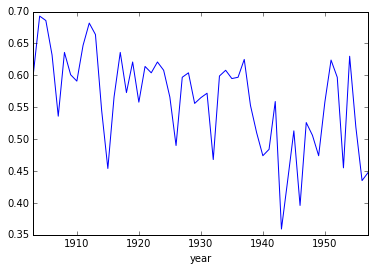

In [214]:
ax=df.plot(x='year', y='W-L%', legend=False)

In [97]:
df.head()

,L,Rk,Rk%,W,W-L%,year,misery
year,,,,,,,
1903,63,6,0.3750,77,0.550,1903,-0.25
1904,65,7,0.4375,86,0.570,1904,-0.50
1905,78,10,0.6250,76,0.493,1905,0.00
1906,64,6,0.3750,89,0.582,1906,-0.25
1907,67,7,0.4375,85,0.559,1907,-0.50


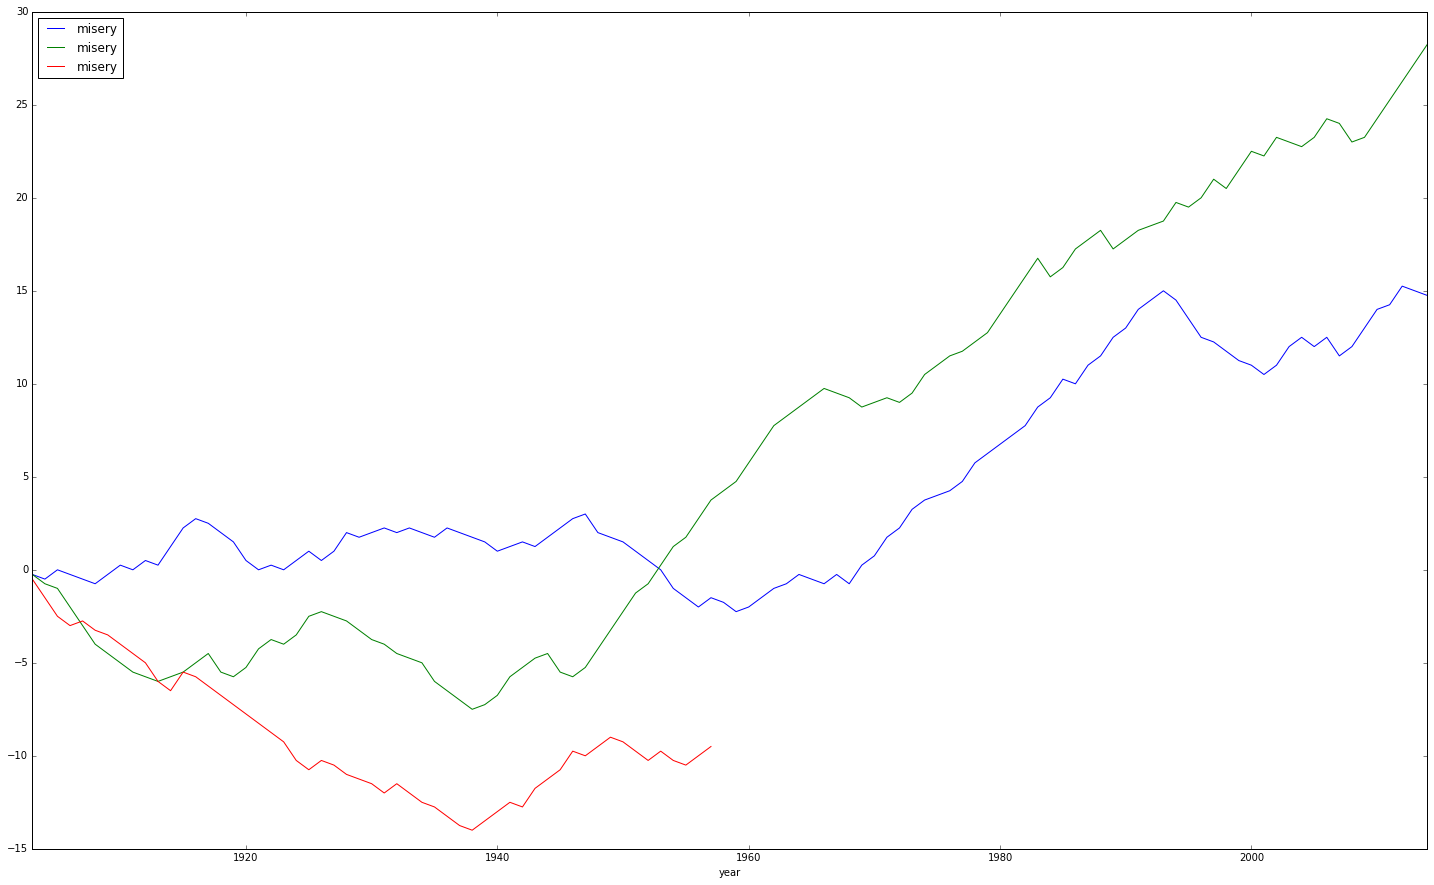

In [180]:
fig, ax=plt.subplots(figsize=(25,15))
cle_df.plot(x='year', y='misery', ax=ax)
chc_df.plot(x='year', y='misery', ax=ax)
nyg_df.plot(x='year', y='misery', ax=ax)